In [128]:
# SVM  with linear kernel
# SVM with rbf kernel
# SVM with degree 3 kernel
# karmaşık datasetlerde kerneller bize yardımcı olur

# ----Linear Kernel----
# diğerlerinden hızlıdır

# ----RBF (Gaussian Radial Basis Function)----
# Linear olmayan veriler için kulanılır
# manuel gamma parametresi değeri = 0.1

# ----Polynomisl Kernel----
# linear kernelin daha genel halidir
# diğerleri kadar tercih edilmez

In [129]:
# ----Naive Bayes Sınıflandırma----
# dengesiz veri stetlerinde kullanılabilir
# yüksek boyutlu verilerde iyi çalışır
# az veriyle iyi işler başarabilir
# her özellik bağımsız olduğu için logistic regresyon gibi modellerdedn daha iyi sonuçlar verir

# türleri = Gaussian Naive , Multinominial Naive Bayes, Bernoulli Naive Bayes

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [131]:
data = pd.read_excel(r'/content/drive/MyDrive/Dry_Bean_Dataset.xlsx')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [132]:
data.isnull().sum()
data.shape

(13611, 17)

In [133]:
data.duplicated().sum()

68

In [134]:
data = data.drop_duplicates(keep=False)

In [135]:
data.head(),data.shape

(    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
 0  28395    610.291       208.178117       173.888747      1.197191   
 1  28734    638.018       200.524796       182.734419      1.097356   
 2  29380    624.110       212.826130       175.931143      1.209713   
 3  30008    645.884       210.557999       182.516516      1.153638   
 4  30140    620.134       201.847882       190.279279      1.060798   
 
    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
 0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
 1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
 2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
 3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
 4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
 
    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
 0     0.913358

In [136]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [137]:
x = data.iloc[:,0:16]
y = data.Class

In [138]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

le=LabelEncoder()
y=le.fit_transform(y)
y

array([5, 5, 5, ..., 3, 3, 3])

In [139]:
x.shape

(13475, 16)

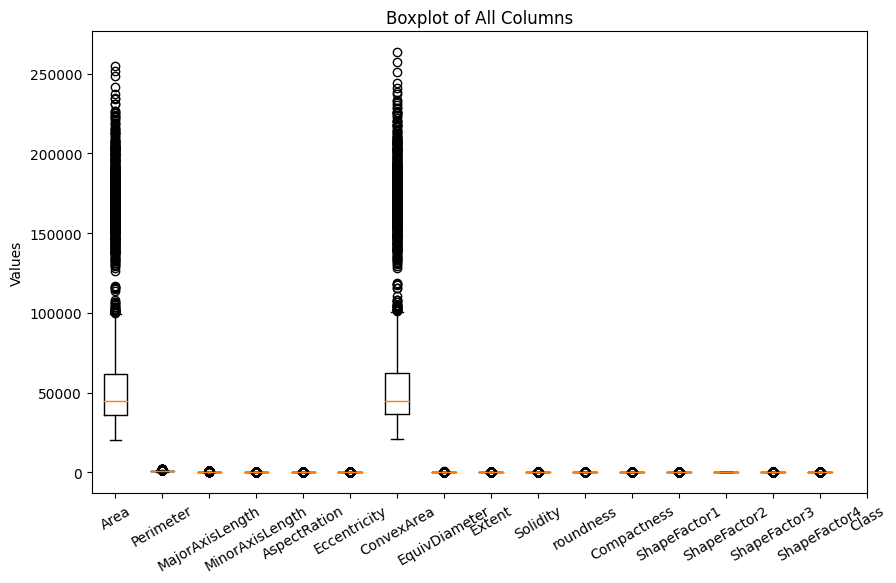

In [140]:
plt.figure(figsize=(10, 6))
plt.boxplot(x.values)
plt.title('Boxplot of All Columns')
plt.ylabel('Values')
plt.xticks(range(1, len(data.columns) + 1), labels=data.columns, rotation=30)
plt.show()

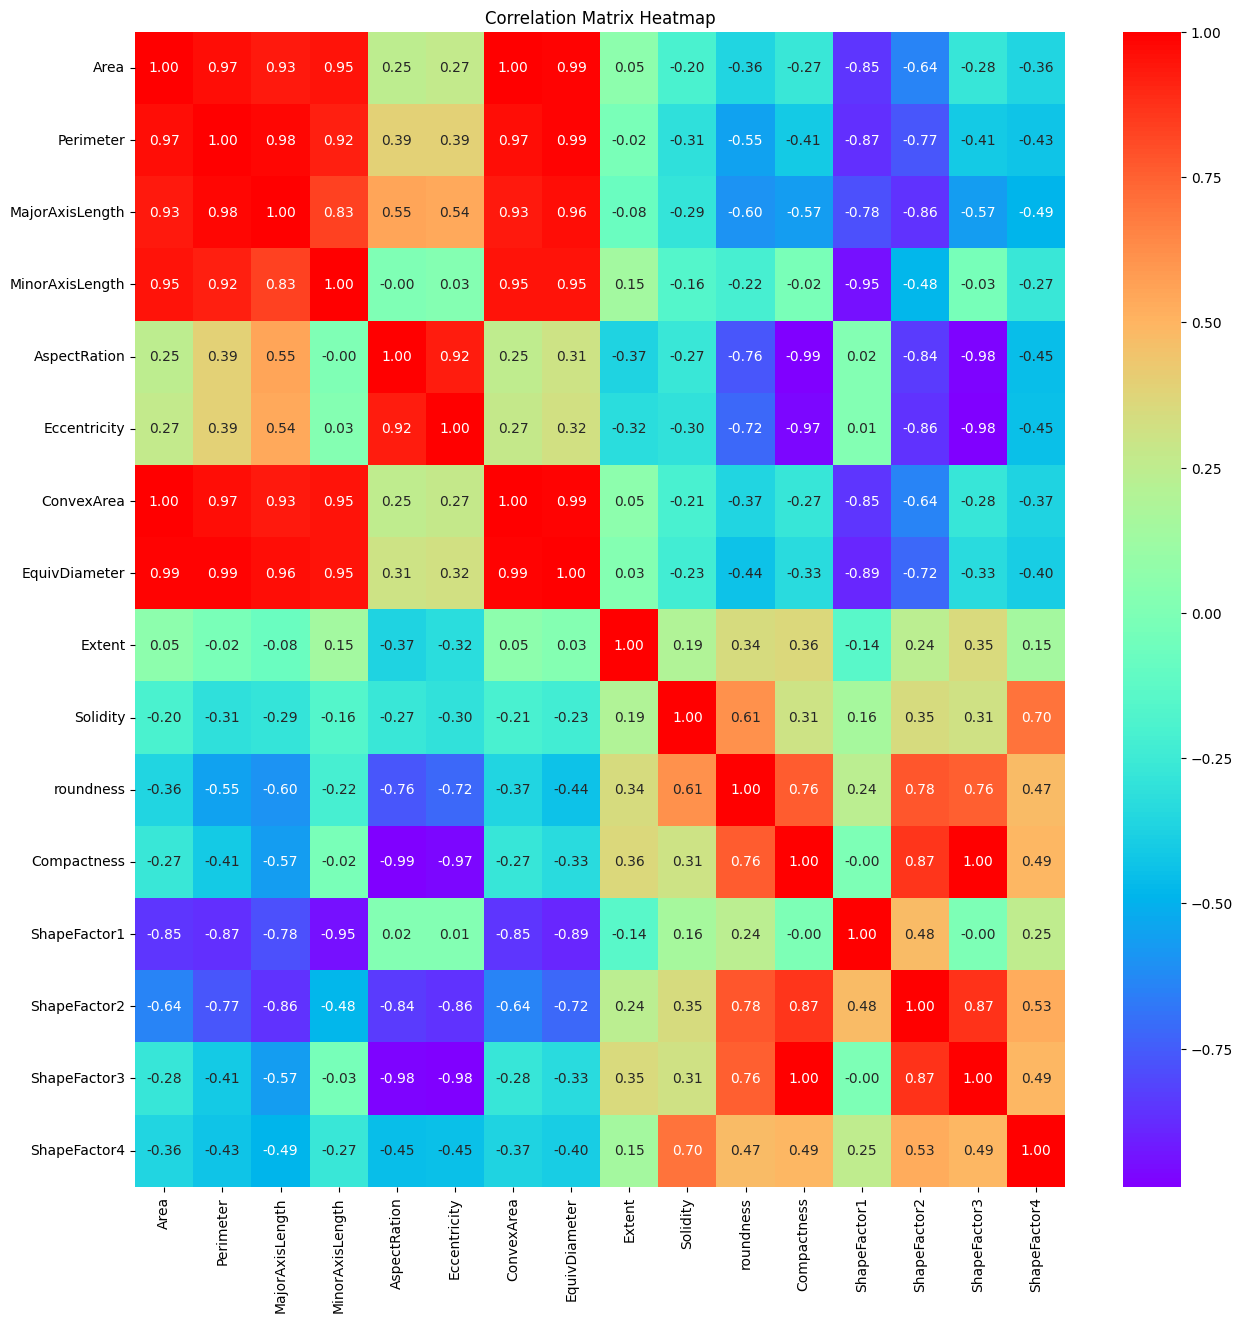

In [141]:
correlation_matrix = x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13475 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13475 non-null  int64  
 1   Perimeter        13475 non-null  float64
 2   MajorAxisLength  13475 non-null  float64
 3   MinorAxisLength  13475 non-null  float64
 4   AspectRation     13475 non-null  float64
 5   Eccentricity     13475 non-null  float64
 6   ConvexArea       13475 non-null  int64  
 7   EquivDiameter    13475 non-null  float64
 8   Extent           13475 non-null  float64
 9   Solidity         13475 non-null  float64
 10  roundness        13475 non-null  float64
 11  Compactness      13475 non-null  float64
 12  ShapeFactor1     13475 non-null  float64
 13  ShapeFactor2     13475 non-null  float64
 14  ShapeFactor3     13475 non-null  float64
 15  ShapeFactor4     13475 non-null  float64
 16  Class            13475 non-null  object 
dtypes: float64(14), i

In [143]:
# drop ConvexArea,Perimiter,major axis length
x.drop(['ConvexArea','Perimeter','Area'],inplace=True,axis=1)

In [144]:
x.shape

(13475, 13)

In [145]:
x.head()

,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,208.178117,173.888747,1.197191,0.549812,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,200.524796,182.734419,1.097356,0.411785,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,212.826130,175.931143,1.209713,0.562727,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,210.557999,182.516516,1.153638,0.498616,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,201.847882,190.279279,1.060798,0.333680,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [146]:
liste = ["MajorAxisLength","MinorAxisLength","EquivDiameter"]
scaler = MinMaxScaler()

for item in liste:
    x[[item]] = scaler.fit_transform(x[[item]])

x.head()

,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.044262,0.152142,1.197191,0.549812,0.070804,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,0.030479,0.178337,1.097356,0.411785,0.073577,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,0.052633,0.158190,1.209713,0.562727,0.078816,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,0.048548,0.177691,1.153638,0.498616,0.083854,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,0.032862,0.200679,1.060798,0.333680,0.084906,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


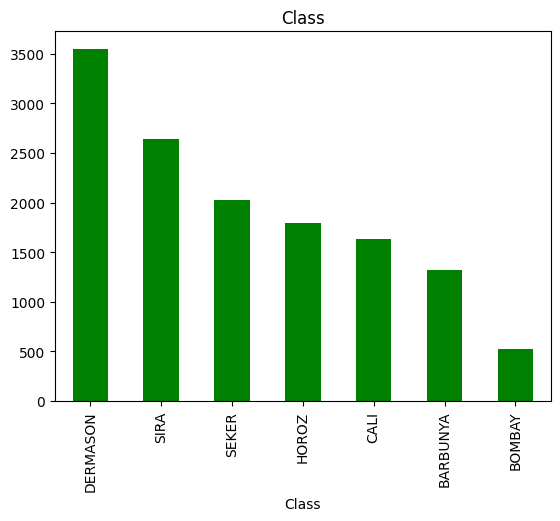

In [147]:
counts = data['Class'].value_counts()
plt.title("Class")
counts.plot(kind='bar',color='g')
plt.show()

In [148]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13475 entries, 0 to 13610
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  13475 non-null  float64
 1   MinorAxisLength  13475 non-null  float64
 2   AspectRation     13475 non-null  float64
 3   Eccentricity     13475 non-null  float64
 4   EquivDiameter    13475 non-null  float64
 5   Extent           13475 non-null  float64
 6   Solidity         13475 non-null  float64
 7   roundness        13475 non-null  float64
 8   Compactness      13475 non-null  float64
 9   ShapeFactor1     13475 non-null  float64
 10  ShapeFactor2     13475 non-null  float64
 11  ShapeFactor3     13475 non-null  float64
 12  ShapeFactor4     13475 non-null  float64
dtypes: float64(13)
memory usage: 1.4 MB


In [149]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=999)

In [154]:
#making the function for optimizing the estimator parameter

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

def largest(arr):
    mx = arr[0]
    for i in range(1,len(arr)-1):
        if arr[i] > mx:
            mx = arr[i]
    return mx

for i in range(1,11):
  arr=[]
  model = RandomForestClassifier(n_estimators=i)
  model.fit(x_train, y_train)
  y_test_pred = model.predict(x_test)
  val=accuracy_score(y_test,y_test_pred)
  print(val)
  arr.append(val)

if largest(arr):
  print(f"best estimator for model is {i}")
  model = RandomForestClassifier(n_estimators=i)
  model.fit(x_train, y_train)
  y_test_pred = model.predict(x_test)
  print(classification_report(y_test,y_test_pred))
  print(confusion_matrix(y_test,y_test_pred))

0.8838589981447125
0.8931354359925788
0.9087198515769944
0.9183673469387755
0.9157699443413729
0.9098330241187385
0.9198515769944341
0.9168831168831169
0.9202226345083488
0.922077922077922
best estimator for model is 10
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       258
           1       1.00      1.00      1.00       112
           2       0.93      0.92      0.92       326
           3       0.90      0.93      0.92       725
           4       0.97      0.94      0.96       354
           5       0.95      0.95      0.95       382
           6       0.88      0.86      0.87       538

    accuracy                           0.92      2695
   macro avg       0.93      0.93      0.93      2695
weighted avg       0.92      0.92      0.92      2695

[[235   0  18   0   1   3   1]
 [  0 112   0   0   0   0   0]
 [ 18   0 299   0   4   0   5]
 [  0   0   0 676   0  10  39]
 [  1   0   5   3 334   0  11]
 [  3   0   0   7   0 363   

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       258
           1       1.00      1.00      1.00       112
           2       0.94      0.92      0.93       326
           3       0.90      0.93      0.92       725
           4       0.94      0.94      0.94       354
           5       0.93      0.94      0.93       382
           6       0.88      0.85      0.86       538

    accuracy                           0.92      2695
   macro avg       0.93      0.93      0.93      2695
weighted avg       0.92      0.92      0.92      2695

[[236   0  16   0   1   3   2]
 [  0 112   0   0   0   0   0]
 [ 14   0 300   0  10   0   2]
 [  0   0   0 677   0  11  37]
 [  4   0   3   3 334   0  10]
 [  3   0   1   8   0 358  12]
 [  1   0   0  61   9  12 455]]
